In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import itertools
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

mv: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d hojjatk/mnist-dataset

Dataset URL: https://www.kaggle.com/datasets/hojjatk/mnist-dataset
License(s): copyright-authors
100% 22.0M/22.0M [00:02<00:00, 20.6MB/s]
100% 22.0M/22.0M [00:02<00:00, 11.0MB/s]


In [ ]:
!unzip mnist-dataset.zip

Archive:  mnist-dataset.zip
  inflating: t10k-images-idx3-ubyte/t10k-images-idx3-ubyte  
  inflating: t10k-images.idx3-ubyte  
  inflating: t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte  
  inflating: t10k-labels.idx1-ubyte  
  inflating: train-images-idx3-ubyte/train-images-idx3-ubyte  
  inflating: train-images.idx3-ubyte  
  inflating: train-labels-idx1-ubyte/train-labels-idx1-ubyte  
  inflating: train-labels.idx1-ubyte  


In [ ]:
import struct
import numpy as np
import csv

def read_idx(filename):
    with open(filename, 'rb') as f:
        magic, num_images, rows, cols = struct.unpack('>IIII', f.read(16))
        image_data = np.frombuffer(f.read(), dtype=np.uint8)
        images = image_data.reshape((num_images, rows, cols))
    return images

def read_idx_labels(filename):
    with open(filename, 'rb') as f:
        magic, num_labels = struct.unpack('>II', f.read(8))
        labels = np.frombuffer(f.read(), dtype=np.uint8)
    return labels


In [ ]:
def save_to_csv(images, output_file):
    with open(output_file, mode='w', newline='') as f:
        writer = csv.writer(f)
        header = [f'pixel_{i}' for i in range(images.shape[1] * images.shape[2])]
        writer.writerow(header)
        for image in images:
            writer.writerow(image.flatten())

def save_labels_to_csv(labels, output_file):
    with open(output_file, mode='w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(['label'])
        for label in labels:
            writer.writerow([label])

Number of test images: 10000
Image dimensions: 28x28


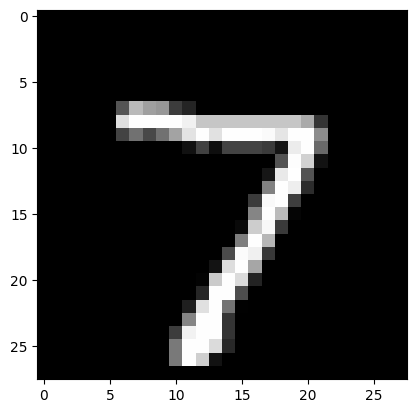

Number of train images: 60000
Image dimensions: 28x28


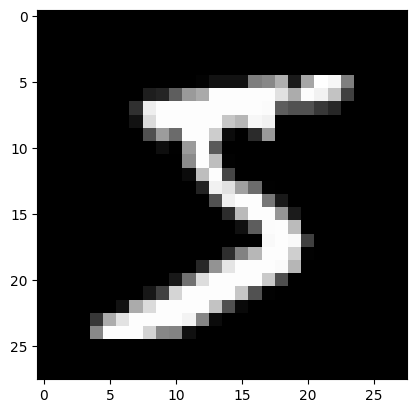

In [ ]:
#testing input
test_image = 't10k-images.idx3-ubyte'
#training input
train_image = 'train-images.idx3-ubyte'

# Read images
test_images = read_idx(test_image)
train_images = read_idx(train_image)

# Display information about the testing dataset
print(f'Number of test images: {test_images.shape[0]}')
print(f'Image dimensions: {test_images.shape[1]}x{test_images.shape[2]}')

import matplotlib.pyplot as plt
plt.imshow(test_images[0], cmap='gray')
plt.show()

# Display information about the testing dataset
print(f'Number of train images: {train_images.shape[0]}')
print(f'Image dimensions: {train_images.shape[1]}x{train_images.shape[2]}')

import matplotlib.pyplot as plt
plt.imshow(train_images[0], cmap='gray')
plt.show()

In [ ]:
test_csv = 'test-images.csv'
train_csv = 'train-images.csv'

# Save the images to CSV
save_to_csv(test_images, test_csv)
save_to_csv(train_images, train_csv)

# print(f'Data successfully written to {train_csv}')
# print(f'Data successfully written to {test_csv}')

In [ ]:
#outputs
test_label = 't10k-labels.idx1-ubyte'
train_label = 'train-labels.idx1-ubyte'

In [ ]:
# Read the labels
test_labels = read_idx_labels(test_label)
train_labels = read_idx_labels(train_label)

# Path for the CSV output file
test_csv = 'test-labels.csv'
train_csv = 'train-labels.csv'

# Save the labels to CSV
save_labels_to_csv(test_labels, test_csv)
save_labels_to_csv(train_labels, train_csv)

# print(f'Labels successfully written to {train_csv}')
# print(f'Labels successfully written to {test_csv}')

# Checking Given data

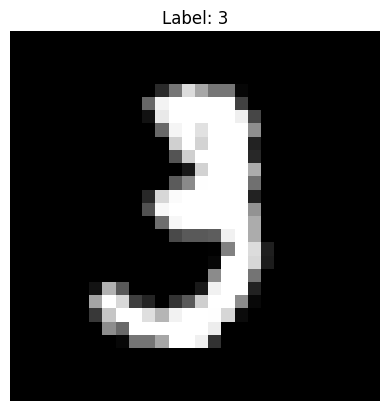

In [ ]:
# Slecting a random image and corresponding level
image = train_images[10]
label = train_labels[10]

# Display the image
plt.imshow(image, cmap='gray')
plt.title(f'Label: {label}')
plt.axis('off')  # Hide axis
plt.show()

In [ ]:
df = pd.read_csv("train-images.csv")
df.shape

(60000, 784)

# **Data Preprocessing**

In [ ]:
X_train = pd.read_csv("train-images.csv")
y_train = pd.read_csv("train-labels.csv")

X_test = pd.read_csv("test-images.csv")
y_test = pd.read_csv("test-labels.csv")

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
X_train.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train.head()

,label
0,5
1,0
2,4
3,1
4,9


In [ ]:
x_train = np.array(X_train)
y_train = np.array(y_train)
x_test = np.array(X_test)
y_test = np.array(y_test)
len(X_train)

60000

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


# **CNN Model**

In [ ]:
model = Sequential()
input_shape = (28, 28, 1)

#convolutional Layers
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Flatten Layer
model.add(Flatten())

# Fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])

In [ ]:
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8065 - loss: 0.5488
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9846 - loss: 0.0642
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9889 - loss: 0.0440
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9899 - loss: 0.0396
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9924 - loss: 0.0308
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9932 - loss: 0.0285
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9934 - loss: 0.0279
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9942 - loss: 0.0240
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9956 - loss: 0.0194
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9946 - loss: 0.0250


In [ ]:
import pickle
# Save the model to a file 'model.pkl'
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9881 - loss: 0.0647


[0.0488005205988884, 0.9907000064849854]

In [ ]:
j = random.randint(0,(len(X_test)))
j

7377

In [ ]:
pred = model.predict(x_test[j].reshape(1, 28, 28, 1))
print(pred.argmax())

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step
9


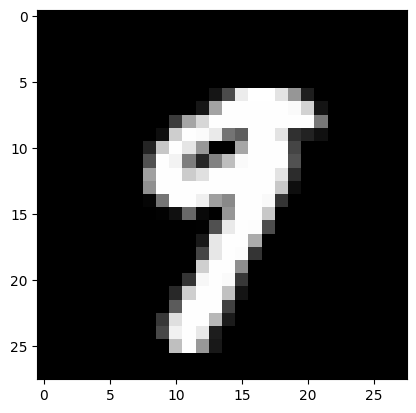

In [ ]:
pic1 = X_test.iloc[j].values.reshape(28,28)
plt.imshow(pic1, cmap='gray')